In [ ]:
# импортирую библиотеки
import math as mh               # math для математических операций
import pandas as pd             # pandas для работы с датафреймами
import numpy as np              # numpy 
import matplotlib.pyplot as plt # matplotlib для построения графиков
from scipy import stats as st   # stats для проведения статистического анализа
import seaborn as sns           # seaborn для визуализации

# Описание проекта


Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xboxили PlayStation). Перед нами данные до 2016 года. 
Необходимо определить перспективные игры для увеличения продаж. 



*Рейтинг игр ESRB (Entertainment Software Rating Board)*  
**«EC» («Early childhood»)** — «Для детей младшего возраста»  
**«E» («Everyone») и  "K-A" ("Kids to Adults")** — «Для всех»  
**«E10+» («Everyone 10 and older»)** — «Для всех от 10 лет и старше»  
**«T» («Teen»)** — «Подросткам»  
**«M» («Mature»)** — «Для взрослых»  
**«AO» («Adults Only 18+»)** — «Только для взрослых»  
**«RP» («Rating Pending»)** — «Рейтинг ожидается»


# Открытие файла с данными и изучение общей информации

In [ ]:
# посмотрим на первые строки датафрейма
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# посмотрим последние строки датафрейма
df.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


In [ ]:
# посмотрим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В информации о датафрейме мы видим, что не все строки заполнены в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating.  
Причинами пропусков в данных может быть ошибка ввода данных, сокрытие информации.  
Пропуски в столбце Rating могут буть потому-что, до 1994 года  не было рейтинга ESRB (SRB была основана в 1994 году ESRB_wikipedia ), а также возможно данные просто ошибочно не были введены.

In [ ]:
# посмотрим статистическую информацию
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


В статистической информации видим только столбцы в числовом формате.  
В столбце года выхода игр видим, что самые ранние игры вышли в 1980 году.

In [ ]:
# посмотрим ТОП-10 платформ по количеству выпущенных игр.
df['Platform'].value_counts().head(10)

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
Name: Platform, dtype: int64

Лидерами по количеству выпущенных за все представленные года игр являются PS2, DS, PS3, Wii, X360, PSP, PS, PC, XB, GBA 

In [ ]:
# приведем названия колонок к нижненму регистру

df.columns = [x.lower() for x in df.columns]
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [ ]:
# проверим количество пропущенных значений по столбцам датафрейма
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

# Подготовка данных.

In [ ]:
# выведем на экран строки с пропущеным названием игры
df.loc[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строк с пропущеным названием игр всего две, их можно удалить.

In [ ]:
# удаляем строки с пропущенным названием игр
df = df.drop(df[df['name'].isna()].index).reset_index(drop=True)


In [ ]:
# Посмотрим какие оценки ставят играм пользователи
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

Оценка "0" есть только у одной игры, пропуски в значениях и значения "tbd" можно заменить на "0" и при проверке гипотез не учитывать такие данные.

In [ ]:
# заменим все NaN-данные нулем, чтобы было удобнее считать и преобразовывать данные

df = df.fillna(0)
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0,0
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0,0


In [ ]:
# приведем данные в колонке year_of_release к формату  int

df['year_of_release'] = df['year_of_release'].astype('int')


In [ ]:
# cгруппируем данные в столбцах с рейтингом, чтобы  найти аббревиатуру 'tbd'
df.groupby(['user_score', 'critic_score'])['genre'].count()

user_score  critic_score
0           0.0             6661
            33.0               1
            40.0               1
            44.0               1
            46.0               1
                            ... 
tbd         86.0               2
            87.0               1
            88.0               1
            89.0               1
            90.0               1
Name: genre, Length: 2499, dtype: int64

tbd расшифровывается - To Be Determined, то есть "Будет определено", то есть можно сказать что оценка пользователями еще не проставлена. Поэтому заменим эти значения на 0, чтобы было удобнее считать.

In [ ]:
# заменим "tbd" на ноль для того, чтобы было удобно считать
df['user_score']=df['user_score'].replace('tbd',0.00)

In [ ]:
# поменяем тип данных user_score на float, чтобы было удобно считать 
df['user_score'] = df['user_score'].astype(float)
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

In [ ]:
# заменим рейтинг 'K-A' на 'E'
df['rating']=df['rating'].replace('K-A','E')

In [ ]:
# проверим значения в столбце rating
df['rating'].unique()

array(['E', 0, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

In [ ]:
# создам колонку с общей суммой продаж
df['total_sales'] = df['eu_sales']+df['jp_sales']+df['na_sales']+df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,0,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,0,31.38


В процессе подготовки данных удалили две строки с пропущенным названием игр, в колонке 'user_score' нашли аббревиатуру 'tbd' и заменили на "0", также на "0" заменили все пропуски. Изменили тип данных в столбцах  year_of_release и user_score. Посчитали сумму всех продаж и добалили новый столбец 'total_sales'.

# Исследовательский анализ данных.

In [ ]:
# сгруппирую датафрейм по годам выпуска видеоигр и подсчитаю количество выпущенных игр
year = df.groupby(['year_of_release']).agg({'name':['count']}).reset_index()
year.columns = ['year_of_release', 'count']
year.head()

,year_of_release,count
0,0,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17


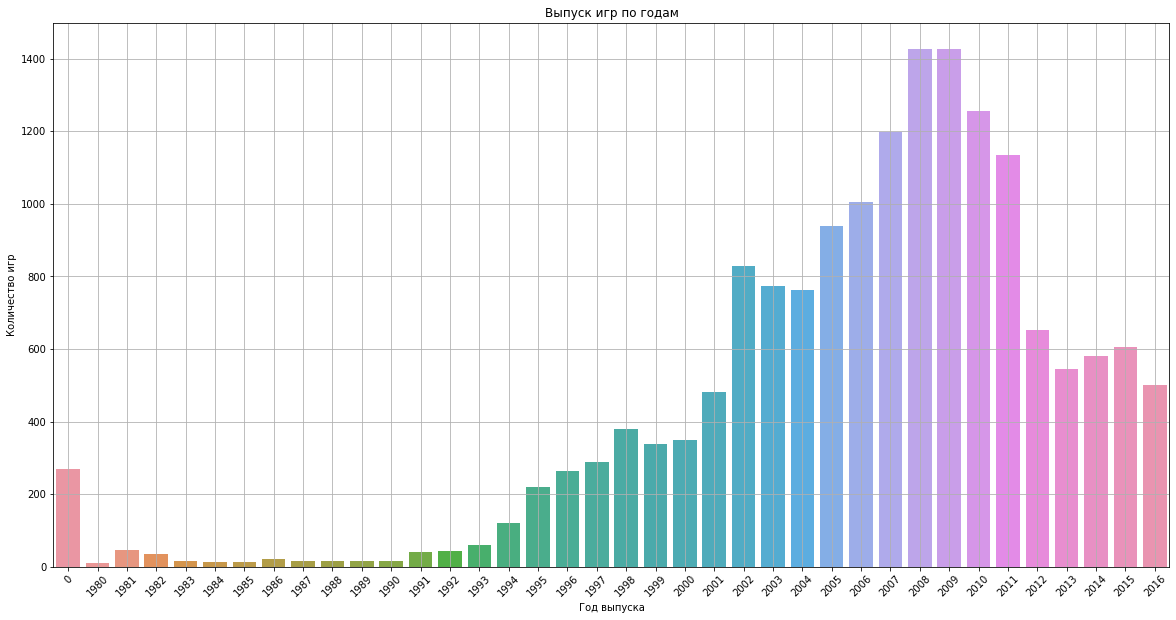

In [ ]:
# построю диаграмму для визуализации распределения количества выпускаемых игр по годам.
plt.figure(figsize=(20,10))
pl=sns.barplot(data=year, x="year_of_release", y="count")
pl.set(title='Выпуск игр по годам', xlabel = 'Год выпуска', ylabel = 'Количество игр')
plt.xticks(rotation=45)
plt.grid();

до 1994 года мало количество выпущенных игр, удалим данные до 1994 года.

In [ ]:
# проверим количество игр выпущенных до 1994 года
df.loc[df['year_of_release']<1994, 'year_of_release'].count()

634

In [ ]:
# удалим данные до 1994 года
df = df.loc[df['year_of_release'] >= 1994]

In [ ]:
# посмотрим, как менялись продажи по платформам, создадим сводную таблицу и отсортируем по убыванию

df_pivot = df.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
                          , aggfunc='sum').sort_values(by = 'total_sales', ascending=False).reset_index()
df_pivot

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS2,332.63,137.54,572.92,190.47,1233.56
1,X360,268.32,12.30,595.74,84.88,961.24
2,PS3,327.21,79.41,390.13,134.59,931.34
3,Wii,258.32,68.28,486.87,77.71,891.18
4,DS,188.41,175.00,380.31,59.04,802.76
5,PS,212.39,139.78,334.72,40.69,727.58
6,PS4,141.09,15.96,108.74,48.35,314.14
7,GBA,74.59,46.56,184.12,7.61,312.88
8,PSP,65.62,75.88,107.27,40.76,289.53
9,3DS,61.27,100.62,82.65,13.27,257.81


In [ ]:
# отберем 5 платформ с наибольшими суммарными продажами
df_pivot = df_pivot.sort_values(by = 'total_sales', ascending=False).head()


In [ ]:
# создадим список платформ с наибольшими суммарными продажами
platform_good = df_pivot['platform'].unique()

In [ ]:
# построим распределение по годам по платформам с наибольшими суммарными продажами
platform_max = df.query('platform in @platform_good').groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
platform_max.columns=['platform', 'year_of_release', 'sales_sum']
platform_max.head(33)


,platform,year_of_release,sales_sum
0,DS,2004,17.27
1,DS,2005,130.14
2,DS,2006,119.81
3,DS,2007,146.94
4,DS,2008,145.31
5,DS,2009,119.54
6,DS,2010,85.02
7,DS,2011,26.18
8,DS,2012,11.01
9,DS,2013,1.54


<Figure size 1440x576 with 0 Axes>

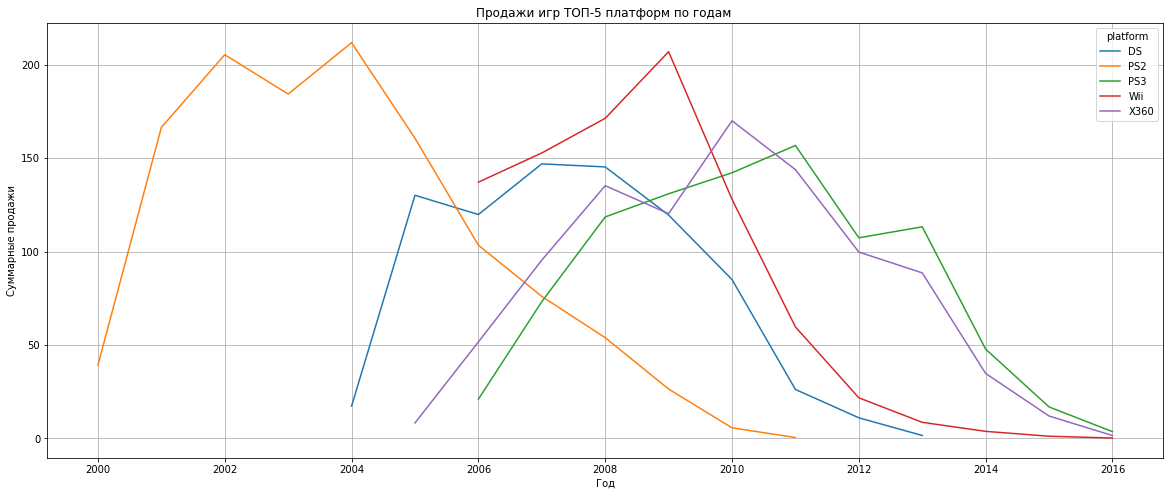

In [ ]:
plt.figure(figsize=(20,8))
platform_plot=platform_max.pivot('year_of_release', 'platform', 'sales_sum').plot(grid = True, figsize=(20,8))
platform_plot.set(title='Продажи игр ТОП-5 платформ по годам ', xlabel = 'Год', ylabel = 'Суммарные продажи')
plt.show();

Видим снижение продаж по платформам с наибольшими суммарными продажами к 2016 году.  
Наибольшее количество продаж пришлось на первое десятилетие 2000 годов.  
C 2001 PS2 делает значительный рывок по продажам и исчезают старые платформы. С 2007 набирает оборот по продажам PS3, а с 2014 - PS4

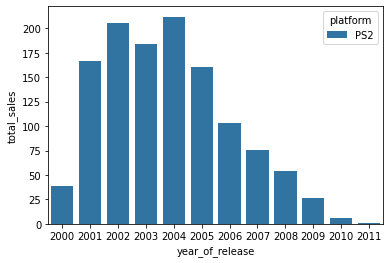

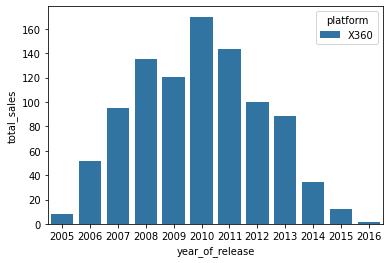

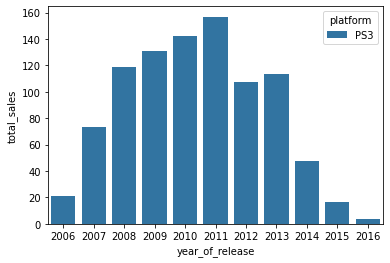

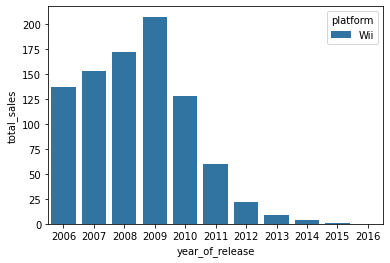

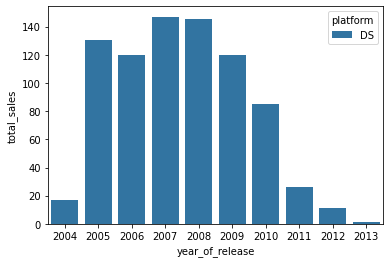

In [ ]:
for name in platform_good:
  games = df.query('platform == @name').groupby(['platform', 'year_of_release'], as_index = False).agg({'total_sales':'sum'})  
  sns.barplot(data=games, x='year_of_release', y='total_sales', estimator=np.sum, hue="platform")
  plt.show();

In [ ]:
# найдем средний период жизни по самым продаваемым платформам
total = 0
for game in platform_good:
  time_min = df[df['platform'] == game].year_of_release.max() - df[df['platform'] == game].year_of_release.min()
  total +=time_min
total = total/5
total  

10.2

Платформы, которые собрали больше всего продаж (наш топ-5), уже не покупаются к 2016 году. Средняя продолжительность существования платформы составляет примерно 10 лет. C 2001 PS2 делает значительный рывок по продажам и исчезают старые платформы. С 2007 набирает оборот по продажам PS3, а с 2014 - PS4 Проверим какие же платформы пользуются наибольшей популярностью в 2016 г.


In [ ]:
# определим какие данные за какой период нужно взять, чтобы исключить значимое искажение распределения по платформам в 2016 году

df.query('year_of_release == 2016').groupby(['year_of_release', 'platform'])['total_sales'].sum()

year_of_release  platform
2016             3DS         15.14
                 PC           5.25
                 PS3          3.60
                 PS4         69.25
                 PSV          4.25
                 Wii          0.18
                 WiiU         4.60
                 X360         1.52
                 XOne        26.15
Name: total_sales, dtype: float64

По данным видны явные выбросы, считаю, что для дальнейшего анализа стоит взять данные с 2012 по 2016 год, чтобы исключить значимое искажение распределения по платформам в 2016 году

In [ ]:
# создадим новый датафрейм с 2012 по 2016 

df_good = df.query('year_of_release >= 2012').reset_index(drop=True)
df_good

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,0,14.63
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,0,14.60
4,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79
...,...,...,...,...,...,...,...,...,...,...,...,...
2881,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
2882,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
2883,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01
2884,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,0,0.01


In [ ]:
# сгруппируем новый датафрейм по году выпуска и платформе и подсчитаю сумму продаж
df_good.groupby(['year_of_release', 'platform'])['total_sales'].sum()

year_of_release  platform
2012             3DS          51.36
                 DS           11.01
                 PC           23.22
                 PS3         107.36
                 PSP           7.69
                 PSV          16.19
                 Wii          21.71
                 WiiU         17.56
                 X360         99.74
2013             3DS          56.57
                 DS            1.54
                 PC           12.38
                 PS3         113.25
                 PS4          25.99
                 PSP           3.14
                 PSV          10.59
                 Wii           8.59
                 WiiU         21.65
                 X360         88.58
                 XOne         18.96
2014             3DS          43.76
                 PC           13.28
                 PS3          47.76
                 PS4         100.00
                 PSP           0.24
                 PSV          11.90
                 Wii           3.75
  

In [ ]:
# сгруппируем данные в столбцах продаж в регионах по платформам, отсортируем по прибыльности и сохраним в переменной df_good_pivot ТОП-5 платформ.
df_good_pivot = df_good.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales']
                          , aggfunc='sum').sort_values(by = 'total_sales', ascending=False).reset_index().head()
df_good_pivot

,platform,eu_sales,jp_sales,na_sales,other_sales,total_sales
0,PS4,141.09,15.96,108.74,48.35,314.14
1,PS3,106.86,35.29,103.38,43.26,288.79
2,X360,74.52,1.57,140.05,20.40,236.54
3,3DS,42.64,87.79,55.31,8.87,194.61
4,XOne,51.59,0.34,93.12,14.27,159.32


В лидерах платформы - PS4, PS3, X360. 

In [ ]:
# Создадим список ТОП-5 платформ
df_new_list = df_good_pivot['platform'].unique()
df_new_list

array(['PS4', 'PS3', 'X360', '3DS', 'XOne'], dtype=object)

Лидеры продаж игр по платформам 'PS4', 'PS3', 'X360', '3DS', 'XOne'

<Figure size 1440x576 with 0 Axes>

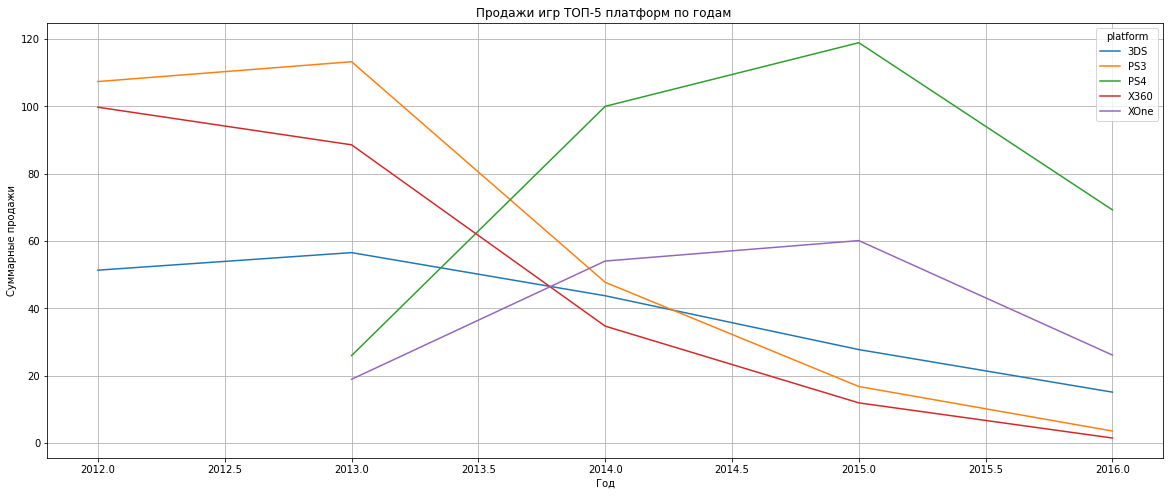

In [ ]:
# построим распределение продаж по платформам-лидерам.
platform_max_good =df_good.query('platform in @df_new_list').groupby(['platform', 'year_of_release']).agg({'total_sales':'sum'}).reset_index()
platform_max_good.columns=['platform', 'year_of_release', 'sales_sum']
plt.figure(figsize=(20,8))
platform_plot=platform_max_good.pivot('year_of_release', 'platform', 'sales_sum').plot(grid = True, figsize=(20,8))
platform_plot.set(title='Продажи игр ТОП-5 платформ по годам ', xlabel = 'Год', ylabel = 'Суммарные продажи')
plt.show();

По графику видно, что продажи игр платформ PS3 и X360 к 2016 году упали практически до 0, по остальным платформам снижение продаж также наблюдается. Меньше всего снизились продажи PS4 и XOne. Платформы PS3, X360 и 3DS выбились в лидеры за счет наличия продаж во всем выбранном нами периоде.

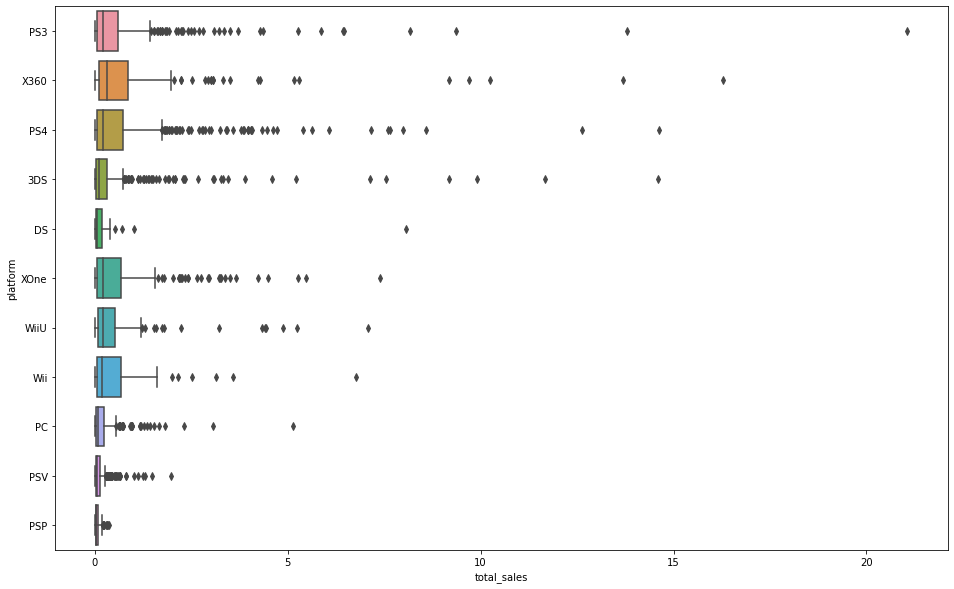

In [ ]:
# Для всех платформ построим "ящик с усами"

plt.figure(figsize=(16,10))
sns.boxplot(y="platform", x="total_sales", data=df_good, orient="h");

In [ ]:
# Создам список всех платформ
df_good_list = df_good['platform'].unique()

In [ ]:
# выведем на экран статистические характеристики платформ
for names in df_good_list:
  print('-------------------------------------------------')
  print(f'статистические характеристики платформы: {names}')
  print('-------------------------------------------------')
  display(df_good.query('platform == @names and critic_score > 0 and user_score > 0').describe())
  plt.show();

-------------------------------------------------
статистические характеристики платформы: PS3
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,2012.737089,0.362019,0.368498,0.095681,0.152019,71.723005,6.715493,0.978216
std,0.743770,0.733912,0.926433,0.162461,0.378903,13.183154,1.506556,2.050723
min,2012.000000,0.000000,0.000000,0.000000,0.000000,13.000000,1.000000,0.010000
25%,2012.000000,0.050000,0.030000,0.000000,0.020000,65.000000,5.900000,0.200000
50%,2013.000000,0.150000,0.130000,0.040000,0.060000,74.000000,7.100000,0.440000
75%,2013.000000,0.380000,0.340000,0.100000,0.150000,81.000000,7.800000,0.960000
max,2015.000000,7.020000,9.090000,0.980000,3.960000,97.000000,9.100000,21.050000


-------------------------------------------------
статистические характеристики платформы: X360
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000,171.000000
mean,2012.625731,0.625673,0.334211,0.008070,0.090234,70.871345,6.448538,1.058187
std,0.735834,1.255818,0.672803,0.014362,0.173907,14.193861,1.470308,2.037991
min,2012.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.300000,0.010000
25%,2012.000000,0.080000,0.050000,0.000000,0.020000,63.500000,5.550000,0.180000
50%,2012.000000,0.280000,0.140000,0.000000,0.040000,74.000000,6.600000,0.480000
75%,2013.000000,0.640000,0.330000,0.010000,0.095000,81.000000,7.550000,1.090000
max,2014.000000,9.660000,5.140000,0.070000,1.410000,97.000000,8.900000,16.270000


-------------------------------------------------
статистические характеристики платформы: PS4
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000,249.000000
mean,2015.056225,0.339197,0.451566,0.037871,0.152369,72.132530,6.749799,0.981004
std,0.914076,0.566725,0.885507,0.068243,0.257127,12.550965,1.455693,1.646217
min,2013.000000,0.000000,0.000000,0.000000,0.000000,19.000000,1.500000,0.010000
25%,2014.000000,0.020000,0.030000,0.000000,0.010000,66.000000,6.100000,0.080000
50%,2015.000000,0.090000,0.120000,0.010000,0.040000,74.000000,7.000000,0.300000
75%,2016.000000,0.390000,0.450000,0.050000,0.170000,80.000000,7.800000,1.100000
max,2016.000000,3.960000,6.310000,0.490000,1.970000,97.000000,9.200000,12.620000


-------------------------------------------------
статистические характеристики платформы: 3DS
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,2013.53000,0.285300,0.200100,0.265400,0.044100,70.420000,7.195000,0.794900
std,1.38137,0.491689,0.436306,0.582404,0.083788,11.758668,1.333665,1.496233
min,2012.00000,0.000000,0.000000,0.000000,0.000000,26.000000,2.400000,0.010000
25%,2012.00000,0.050000,0.010000,0.010000,0.010000,64.000000,6.300000,0.150000
50%,2013.00000,0.145000,0.070000,0.090000,0.020000,71.000000,7.550000,0.325000
75%,2015.00000,0.305000,0.200000,0.280000,0.042500,78.250000,8.200000,0.770000
max,2016.00000,3.660000,3.140000,4.390000,0.630000,92.000000,9.100000,9.900000


-------------------------------------------------
статистические характеристики платформы: DS
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1.0,1.00,1.00,1.00,1.00,1.0,1.0,1.00
mean,2012.0,0.56,0.05,0.37,0.04,80.0,8.2,1.02
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2012.0,0.56,0.05,0.37,0.04,80.0,8.2,1.02
25%,2012.0,0.56,0.05,0.37,0.04,80.0,8.2,1.02
50%,2012.0,0.56,0.05,0.37,0.04,80.0,8.2,1.02
75%,2012.0,0.56,0.05,0.37,0.04,80.0,8.2,1.02
max,2012.0,0.56,0.05,0.37,0.04,80.0,8.2,1.02


-------------------------------------------------
статистические характеристики платформы: XOne
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000,165.000000
mean,2014.921212,0.460788,0.255939,0.001758,0.070667,73.618182,6.538182,0.789152
std,0.975229,0.634467,0.389314,0.005942,0.094541,12.883849,1.340298,1.040746
min,2013.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.100000,0.010000
25%,2014.000000,0.050000,0.040000,0.000000,0.010000,67.000000,5.800000,0.120000
50%,2015.000000,0.210000,0.110000,0.000000,0.030000,76.000000,6.800000,0.340000
75%,2016.000000,0.620000,0.290000,0.000000,0.110000,83.000000,7.500000,1.160000
max,2016.000000,3.220000,2.190000,0.040000,0.480000,97.000000,9.200000,5.470000


-------------------------------------------------
статистические характеристики платформы: WiiU
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,2013.640449,0.344831,0.229438,0.114270,0.053933,70.674157,7.041573,0.742472
std,1.290236,0.549730,0.341096,0.282509,0.083307,14.762341,1.368959,1.215115
min,2012.000000,0.000000,0.000000,0.000000,0.000000,24.000000,2.700000,0.010000
25%,2013.000000,0.070000,0.040000,0.000000,0.010000,65.000000,6.400000,0.120000
50%,2013.000000,0.190000,0.120000,0.010000,0.030000,73.000000,7.400000,0.370000
75%,2015.000000,0.330000,0.270000,0.080000,0.050000,81.000000,8.000000,0.730000
max,2016.000000,3.150000,2.150000,1.460000,0.510000,93.000000,9.100000,7.090000


-------------------------------------------------
статистические характеристики платформы: Wii
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,5.0,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,2012.0,1.406000,0.820000,0.218000,0.202000,76.200000,7.180000,2.646000
std,0.0,1.577444,0.891768,0.334993,0.218792,3.768289,1.025671,2.613442
min,2012.0,0.110000,0.000000,0.000000,0.010000,73.000000,6.000000,0.140000
25%,2012.0,0.330000,0.020000,0.000000,0.020000,74.000000,6.800000,0.680000
50%,2012.0,1.060000,0.830000,0.000000,0.210000,74.000000,7.000000,2.520000
75%,2012.0,1.480000,1.090000,0.330000,0.220000,78.000000,7.300000,3.130000
max,2012.0,4.050000,2.160000,0.760000,0.550000,82.000000,8.800000,6.760000


-------------------------------------------------
статистические характеристики платформы: PC
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,197.000000,197.000000,197.000000,197.0,197.000000,197.000000,197.000000,197.000000
mean,2013.959391,0.089949,0.171117,0.0,0.027259,75.878173,6.454315,0.288325
std,1.501148,0.232055,0.271890,0.0,0.057637,10.400421,1.639451,0.539578
min,2012.000000,0.000000,0.000000,0.0,0.000000,33.000000,1.400000,0.010000
25%,2013.000000,0.000000,0.030000,0.0,0.000000,71.000000,5.500000,0.040000
50%,2014.000000,0.010000,0.080000,0.0,0.010000,78.000000,6.800000,0.120000
75%,2015.000000,0.090000,0.160000,0.0,0.030000,83.000000,7.700000,0.290000
max,2016.000000,2.440000,2.160000,0.0,0.540000,96.000000,9.300000,5.140000


-------------------------------------------------
статистические характеристики платформы: PSV
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000,106.000000
mean,2013.528302,0.080377,0.069717,0.066509,0.037642,71.339623,7.601887,0.254245
std,1.281424,0.116250,0.110621,0.078946,0.052145,10.600887,0.975020,0.272012
min,2012.000000,0.000000,0.000000,0.000000,0.000000,33.000000,3.800000,0.010000
25%,2012.000000,0.000000,0.010000,0.010000,0.010000,64.250000,7.225000,0.090000
50%,2013.500000,0.040000,0.030000,0.040000,0.020000,72.000000,7.800000,0.170000
75%,2014.000000,0.100000,0.080000,0.097500,0.040000,78.750000,8.300000,0.327500
max,2016.000000,0.710000,0.610000,0.380000,0.270000,93.000000,9.300000,1.470000


-------------------------------------------------
статистические характеристики платформы: PSP
-------------------------------------------------


,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,total_sales
count,1.0,1.0,1.0,1.00,1.0,1.0,1.0,1.00
mean,2013.0,0.0,0.0,0.15,0.0,74.0,8.3,0.15
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,2013.0,0.0,0.0,0.15,0.0,74.0,8.3,0.15
25%,2013.0,0.0,0.0,0.15,0.0,74.0,8.3,0.15
50%,2013.0,0.0,0.0,0.15,0.0,74.0,8.3,0.15
75%,2013.0,0.0,0.0,0.15,0.0,74.0,8.3,0.15
max,2013.0,0.0,0.0,0.15,0.0,74.0,8.3,0.15


 За весь период на платформах DS и PSP было продано по 1 игре, на платформе Wii продано 5 игр.Наибольшей популярностью в Европе пользуются платформы PS3, PS4. В Сев.Америке X360, XOne, WiiU. В Японии 3DS. Платформа 3DS в Европе и Сев.Америке пользуется одинаковой популярностью.

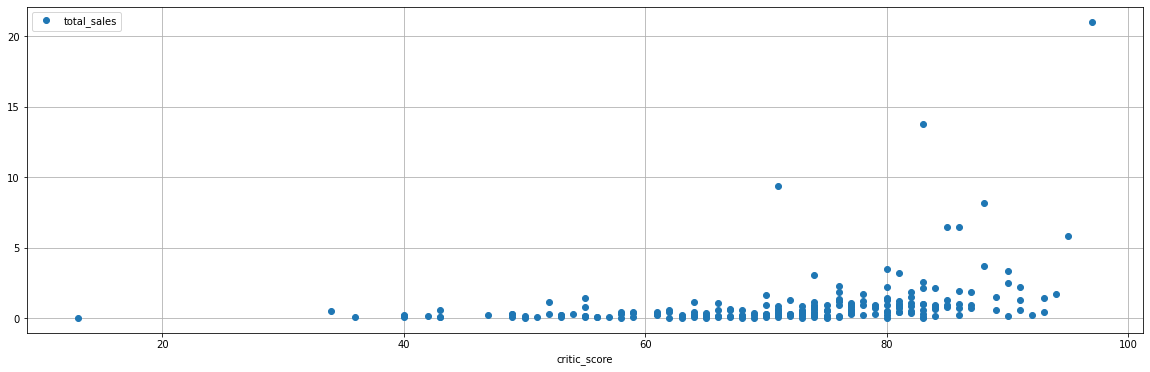

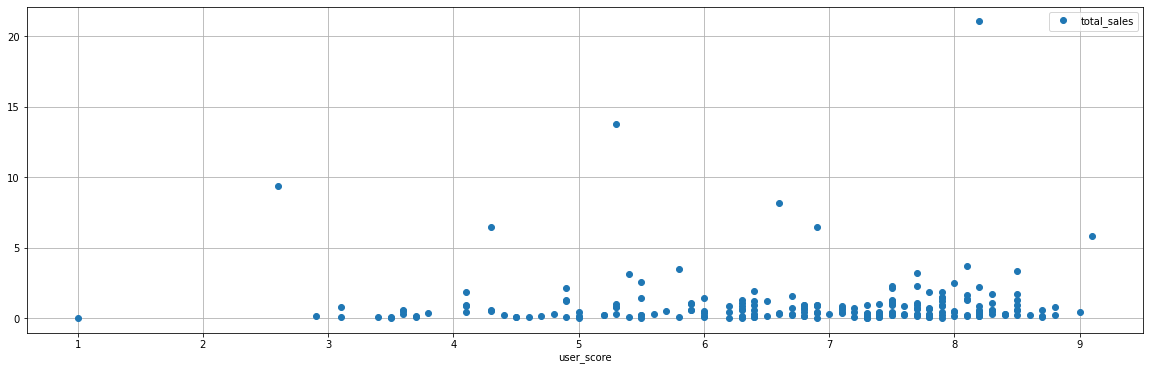

In [ ]:
# посмотрим, как влияют на продажи внутри одной популярной платформы  PS3 отзывы пользователей и критиков. 
PS3 = df_good.query('platform == "PS3" and critic_score > 0 and user_score > 0')      # в переменной сохраним срез данных для платформы  PS3
PS3.plot(x= 'critic_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6)) # построим диаграмму рассеяния для оценок критиков
PS3.plot(x= 'user_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6))   # построим диаграмму рассеяния для оценок пользоваталей
plt.show()

In [ ]:
# найдем корреляцию м/у продажами и оценкой критиков и пользователей
a=PS3['total_sales'].corr(PS3['critic_score'])
print(f'Корреляция между продажами и оценкой критиков: {a}')
b=PS3['total_sales'].corr(PS3['user_score'])
print(f'Корреляция между продажами и оценкой пользователей: {b}')

Корреляция между продажами и оценкой критиков: 0.3310566175801407
Корреляция между продажами и оценкой пользователей: 0.0032274054930356904


Оценки критиков и пользователей различаются, при этом продажи имеют слабую корреляцию с оценками.

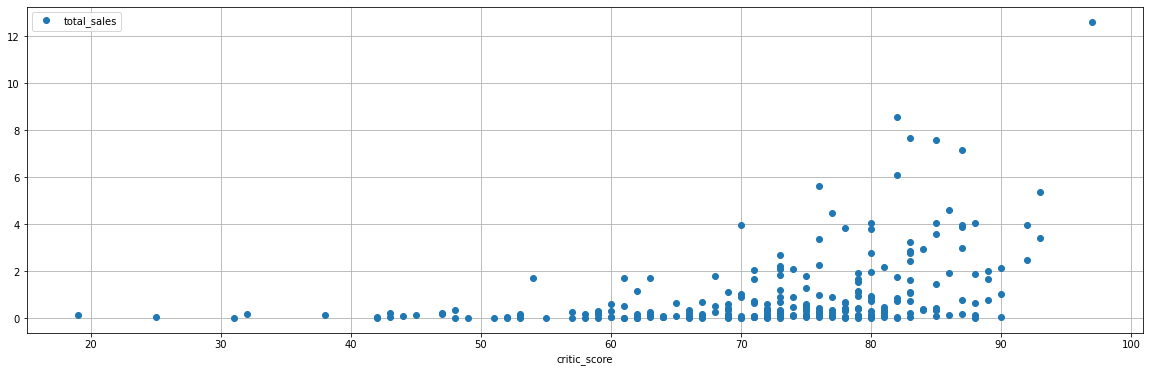

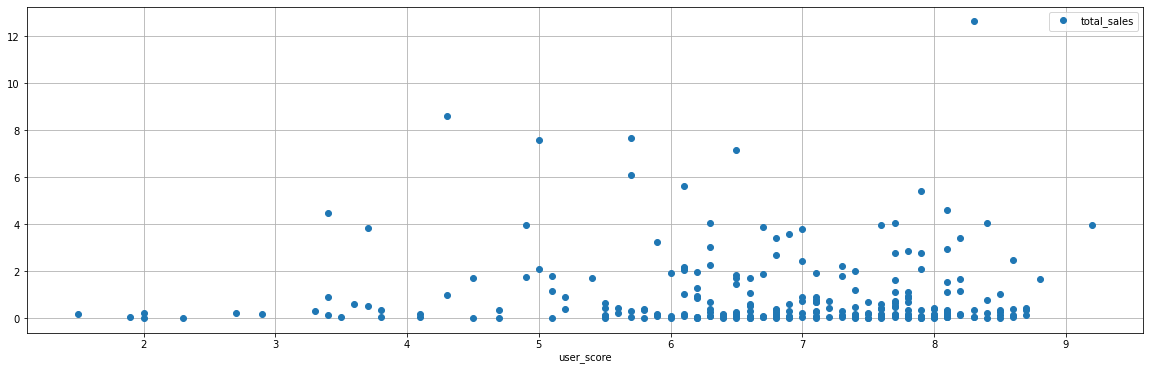

In [ ]:
# посмотрим ещё платформу PS4 для сравнения
PS4 = df_good.query('platform == "PS4" and critic_score > 0 and user_score > 0')

PS4.plot(x= 'critic_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6))
PS4.plot(x= 'user_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6))
plt.show();

In [ ]:
a=PS4['total_sales'].corr(PS4['user_score'])
print(f'Корреляция между продажами и оценкой критиков: {a}')
b=PS4['total_sales'].corr(PS4['critic_score'])
print(f'Корреляция между продажами и оценкой пользователей: {b}')

Корреляция между продажами и оценкой критиков: -0.03362497596528878
Корреляция между продажами и оценкой пользователей: 0.40589480145836687


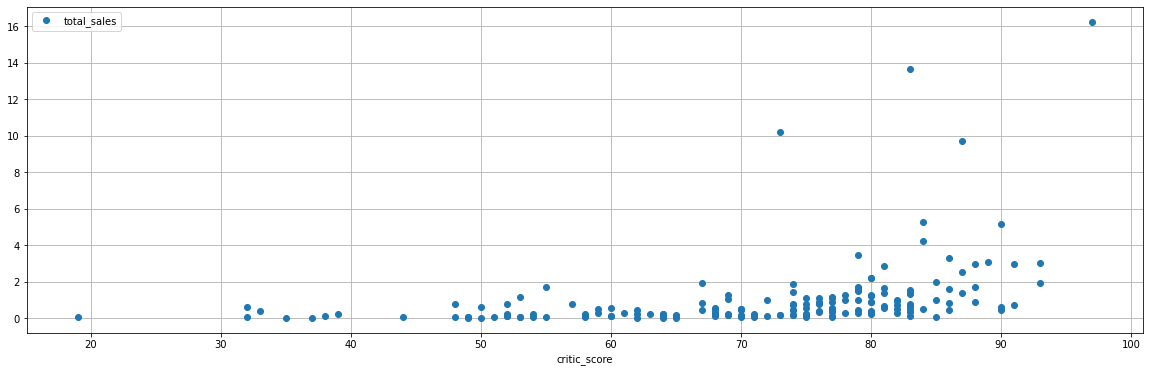

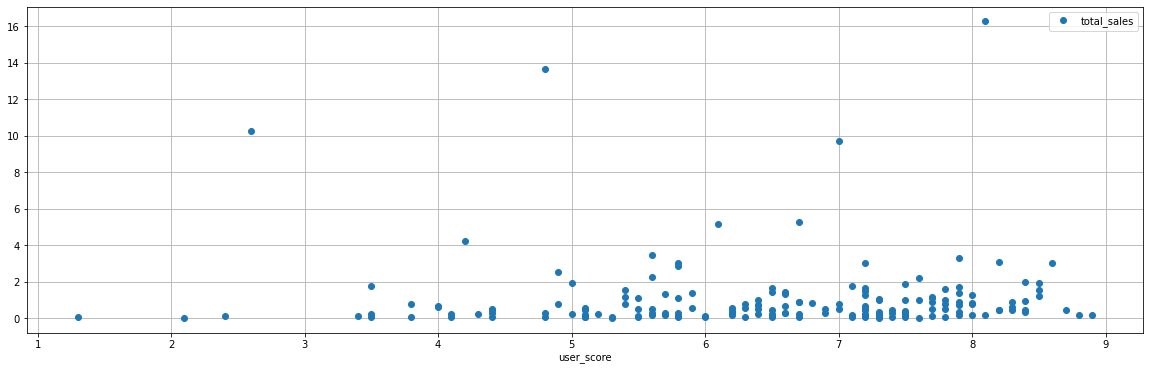

In [ ]:
# посмотрим ещё платформу 3DS для сравнения
X = df_good.query('platform == "X360" and critic_score > 0 and user_score > 0')

X.plot(x= 'critic_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6))
X.plot(x= 'user_score', y= 'total_sales', style='o', grid=True, figsize=(20, 6))
plt.show()

In [ ]:
a=X['total_sales'].corr(X['user_score'])
print(f'Корреляция между продажами и оценкой критиков: {a}')
b=X['total_sales'].corr(X['user_score'])
print(f'Корреляция между продажами и оценкой пользователей: {b}')

Корреляция между продажами и оценкой критиков: -0.002014039482689792
Корреляция между продажами и оценкой пользователей: -0.002014039482689792


Корелляция по оценкам и продажам разная по лидерам платформ - PS4, PS3, X360. Единственным объединяющим факторам можно считать слабую связь между оценками критиков и особенно пользователей.

In [ ]:
# посмотрим на общее распределение игр по жанрам. 
df_good.groupby('genre', as_index=False).agg(
    {'total_sales':['median', 'sum', 'count']}
    ).sort_values(by=('total_sales', 'median'), ascending = False)

genre total_sales              
                      median     sum count
8        Shooter       0.440  304.73   235
10        Sports       0.240  181.07   268
4       Platform       0.210   61.00    85
7   Role-Playing       0.140  192.80   370
6         Racing       0.140   53.50   115
2       Fighting       0.130   44.49   109
0         Action       0.120  441.12  1031
3           Misc       0.120   85.04   192
9     Simulation       0.120   35.12    80
11      Strategy       0.080   13.34    71
5         Puzzle       0.045    4.89    28
1      Adventure       0.030   29.43   302

По медианным показателям прибыльности лидируют Shooter, Sports, Racing, Platform, Role-Playing. В жанре Action самый высокий показатель по суммарным продажам, это могло произойти в следствии большего количества выпущенных и проданных игр.

# Портрет пользователя каждого региона.

In [ ]:
# составим список регионов
region = ['na_sales',	'eu_sales',	'jp_sales',	'other_sales']

In [ ]:
# сгруппируем данный продаж по платформам в различных регионах
for area in region:
  print(area)                    # название региона
  ar=(df_good.groupby('platform', as_index=False).agg({area: ['median','sum']}).sort_values(by =(area, 'sum'), ascending=False).head())  # группирием датафрейм и вычисляем общую сумму продаж по платформам
  display(ar)                    #
  print(' ')
  print(f'сумма продаж: {df_good[area].sum()}') 
  print(' ')
  print('доля продаж')
  display(ar[(area, 'sum')] / (df_good[area].sum()))    # вычисляем долю продаж
  print('-------------------------------')
  print(' ')

na_sales


platform na_sales        
              median     sum
9      X360     0.17  140.05
4       PS4     0.06  108.74
3       PS3     0.05  103.38
10     XOne     0.12   93.12
0       3DS     0.00   55.31

 
сумма продаж: 590.97
 
доля продаж


9     0.236983
4     0.184003
3     0.174933
10    0.157571
0     0.093592
Name: (na_sales, sum), dtype: float64

-------------------------------
 
eu_sales


platform eu_sales        
              median     sum
4       PS4     0.08  141.09
3       PS3     0.03  106.86
9      X360     0.10   74.52
10     XOne     0.07   51.59
0       3DS     0.00   42.64

 
сумма продаж: 506.82000000000005
 
доля продаж


4     0.278383
3     0.210844
9     0.147034
10    0.101792
0     0.084132
Name: (eu_sales, sum), dtype: float64

-------------------------------
 
jp_sales


platform jp_sales       
             median    sum
0      3DS     0.06  87.79
3      PS3     0.03  35.29
6      PSV     0.03  21.04
4      PS4     0.01  15.96
8     WiiU     0.00  13.01

 
сумма продаж: 192.58
 
доля продаж


0    0.455862
3    0.183249
6    0.109253
4    0.082875
8    0.067556
Name: (jp_sales, sum), dtype: float64

-------------------------------
 
other_sales


platform other_sales       
                 median    sum
4       PS4        0.03  48.35
3       PS3        0.02  43.26
9      X360        0.03  20.40
10     XOne        0.02  14.27
0       3DS        0.00   8.87

 
сумма продаж: 156.16
 
доля продаж


4     0.309618
3     0.277024
9     0.130635
10    0.091381
0     0.056801
Name: (other_sales, sum), dtype: float64

-------------------------------
 


Группировка и вычисление значений по регионам подтверждают выводы сделенные выше. В Сев.Америке лидируют в продажах по суммарным продажам X360, PS4, PS3, а по медианным значениям X360, XOne, PS4 В Европе по суммарным значениям лидируют PS4, PS3, X360. По медианным значениям X360, PS4, XOne. В Японии по суммарным и по медианным значениям 3DS, PS3, PSV.

na_sales
           genre na_sales        
                   median     sum
0         Action     0.02  177.84
8        Shooter     0.20  144.77
10        Sports     0.08   81.53
7   Role-Playing     0.02   64.00
3           Misc     0.01   38.19
 


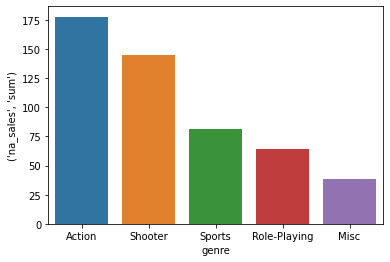

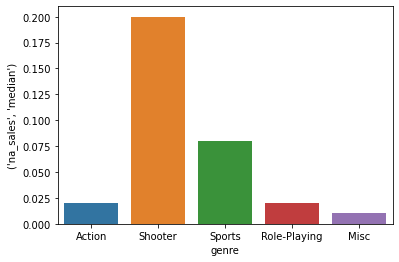

 
eu_sales
           genre eu_sales        
                   median     sum
0         Action     0.02  159.34
8        Shooter     0.17  113.47
10        Sports     0.05   69.09
7   Role-Playing     0.01   48.53
6         Racing     0.09   27.29
 


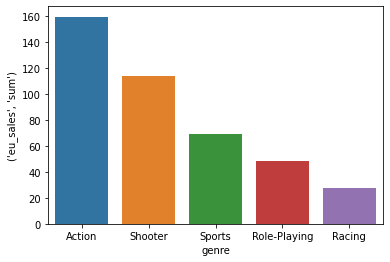

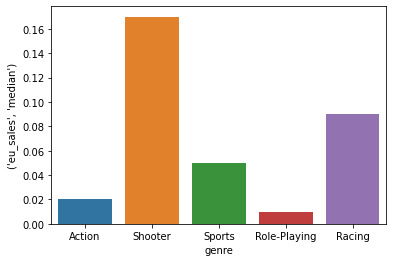

 
jp_sales
          genre jp_sales       
                  median    sum
7  Role-Playing     0.06  65.44
0        Action     0.01  52.80
3          Misc     0.02  12.86
9    Simulation     0.00  10.41
2      Fighting     0.03   9.44
 


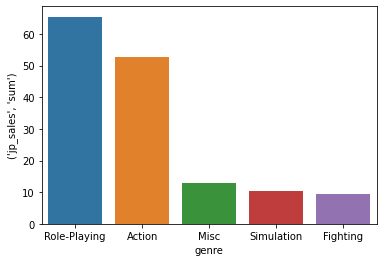

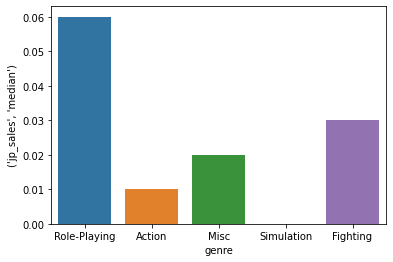

 
other_sales
           genre other_sales       
                      median    sum
0         Action        0.01  51.14
8        Shooter        0.05  37.26
10        Sports        0.02  22.44
7   Role-Playing        0.01  14.83
3           Misc        0.00   7.67
 


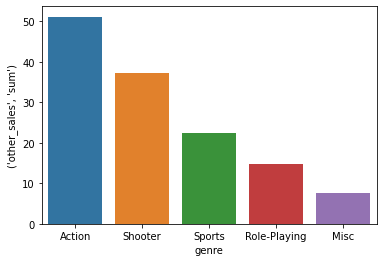

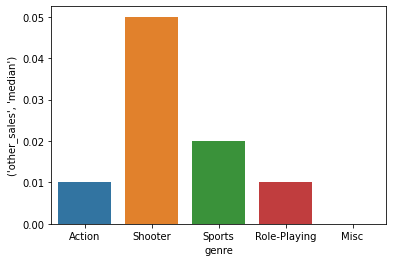

In [ ]:
# Самые популярные жанры для каждого региона.
for area in region:
  na_g = df_good.groupby('genre', as_index=False).agg({area: ['median','sum']}).sort_values(by =(area, 'sum'), ascending=False).head()
  print(area)
  print(na_g)
  print(' ')
  sns.barplot(x="genre", y=(area, 'sum'), data=na_g)
  plt.show();
  sns.barplot(x="genre", y=(area, 'median'), data=na_g)
  plt.show();
  print(' ')

Лидирующие жанры также различаются по регионам. В Сев.Америке и Европе по суммарным продажам Action, Shooter, Sports, по медианным продажам порядок меняется Shooter, Sports, Action. По моему мнению игры жанра Action более дешевые, но и более популярные. В Японии по суммарным продажам Role-Playing, Action, Misc, по медианным Role-Playing, Misc, Action.

Проверим зависимость продаж от рейтинга ESRB

na_sales
  rating na_sales        
           median     sum
3      M    0.155  231.57
1      E    0.070  114.37
0      0    0.000  103.31
2   E10+    0.130   75.70
4      T    0.050   66.02
 


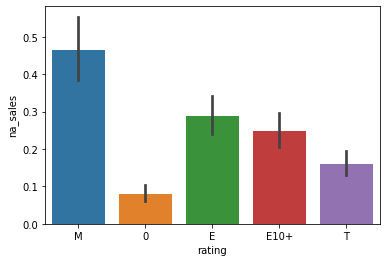

 
eu_sales
  rating eu_sales        
           median     sum
3      M     0.13  193.96
1      E     0.06  113.03
0      0     0.00   91.50
2   E10+     0.11   55.37
4      T     0.04   52.96
 


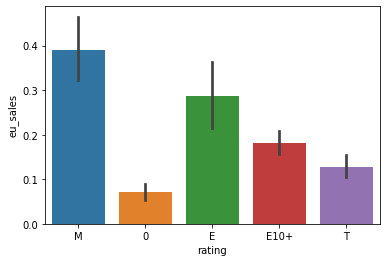

 
jp_sales
  rating jp_sales        
           median     sum
0      0     0.03  108.84
1      E     0.00   28.33
4      T     0.01   26.02
3      M     0.00   21.20
2   E10+     0.00    8.19
 


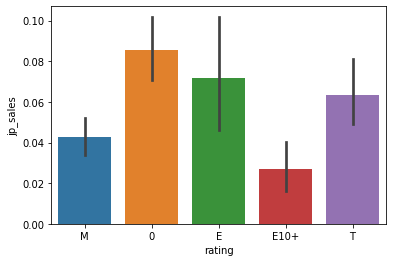

 
other_sales
  rating other_sales       
              median    sum
3      M        0.04  63.38
1      E        0.02  31.44
0      0        0.00  27.17
4      T        0.01  17.94
2   E10+        0.03  16.23
 


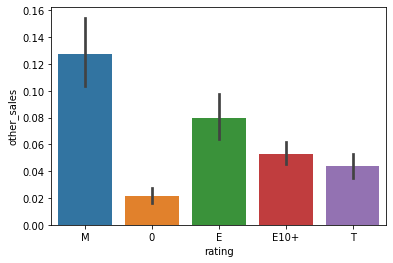

In [ ]:
# вычислим и выведем на экран рейтинг ESRB по регионам
for area in region:
  n = df_good.groupby('rating', as_index=False).agg({area: ['median','sum']}).sort_values(by =(area, 'sum'), ascending=False).head()
  print(area)
  print(n)
  print(' ')
  ax = sns.barplot(x="rating", y=area, data=df_good)
  plt.show();
  print(' ')

Зависимость рейтинга ESRB на продажи подтверждает два предыдущих вывода. Есть виды игр, которые пользуются огромной любовью в Японии (без рейтинга, похоже, что это игры жанра Role-Playing), а есть игры, которые любят весь остальной мир - M и E (похоже, что это Shooter и Action-игры) Возможо, ESRB не проставляет рейтинг японским играм, потому что японская культура существует в параллельной реальности и на параллельном рынке со своими законами.И в Японии есть собственный рейтинг игр - CERO

# Проверка гипотез

Для выявления потенциально популярной платформы и планирования рекламных компаний сравним пользовательские рейтинги платформ Xbox One и PC и жанров Action и Sports.

Сформулируем гипотезы:  
нулевая гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, т.е. XOne_score = PC_score.  
альтернативная гипотеза: Средние пользовательские рейтинги платформ Xbox One и PC различаются, т.е. XOne_score != PC_score.

Среднее значение оценок пользователей платформы XOne равно: 6.52142857142857
Дисперсия оценок пользователей платформы XOne равна: 1.8965188383045533
 
Распределение оценок пользователей платформы XOne:


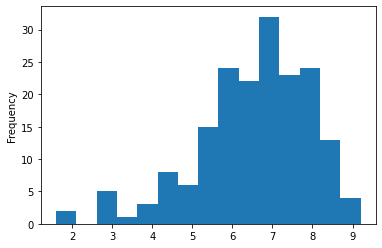

In [ ]:
# Для проверки гипотезы сохраним пользовательские рейтинги платформы Xbox One  в переменной  'XOne_score'
XOne_score = df_good.query('(platform == "XOne")&(user_score != 0.00)').user_score
print(f'Среднее значение оценок пользователей платформы XOne равно: {XOne_score.mean()}') # Вычислим среднее значение оценок пользователей  платформы XOne
print(f'Дисперсия оценок пользователей платформы XOne равна: {np.var(XOne_score)}')       # Вычислим дисперсию оценок пользователей  платформы XOne
print(' ')
print('Распределение оценок пользователей платформы XOne:')                         
XOne_score.plot(y=XOne_score, kind='hist', bins=15);                                              # Построим гистограмму распределения оценок пользователей платформы XOne

Среднее значение оценок пользователей платформы PC равно: 6.428640776699027
Дисперсия оценок пользователей платформы PC равна: 2.7569952398906565
 
Распределение оценок пользователей платформы PC:


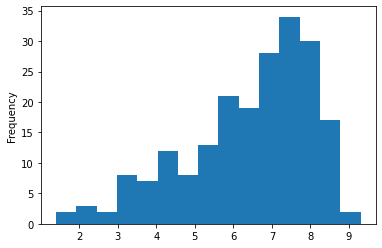

In [ ]:
# Для проверки гипотезы сохраним пользовательские рейтинги платформы PC в переменной  'PC_score'
PC_score = df_good.query('(platform == "PC")&(user_score != 0.00)').user_score
print(f'Среднее значение оценок пользователей платформы PC равно: {PC_score.mean()}') # Вычислим среднее значение оценок пользователей  платформы PC
print(f'Дисперсия оценок пользователей платформы PC равна: {np.var(PC_score)}')       # Вычислим дисперсию оценок пользователей  платформы PC
print(' ')
print('Распределение оценок пользователей платформы PC:')                         
PC_score.plot(y=PC_score, kind='hist', bins=15);                                              # Построим гистограмму распределения оценок пользователей платформы PC

Средние значения оценок пользователей по платформам практически не отличаются, гистограммы имеют асимметрию, что может сказать о преобладании высоких оценок пользователей. Рассчитанные дисперсии отличаются, поэтому при расчете р-значения дисперсии учитывать не будем `equal_var = False`. Критический уровень статистической значимости примем `alpha = 0.05`.  
Проверим гипотезы. 

In [ ]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(XOne_score, PC_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


При проверке не получилось отвергнуть нулевую гипотезу, наблюдаемое различие в расчетных средних получилось случайно.

Сравним пользовательские рейтинги по жанрам Action и Sports.  
нулевая гипотеза: Средние пользовательские рейтинги жанрам Action и Sports одинаковые, т.е. Ac_score = Sp_score.  
альтернативная гипотеза: Средние пользовательские рейтинги жанрам Action и Sports различаются, т.е. Ac_score != Sp_score.

Среднее значение оценок пользователей жанра Action равно: 6.825047801147237
Дисперсия оценок пользователей жанра Action равна: 1.8854720340439228
 
Распределение оценок пользователей жанра Action:


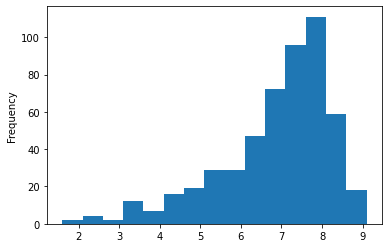

In [ ]:
# Для проверки гипотезы сохраним пользовательские рейтинги жанра Action  в переменной  'Ac_score'
Ac_score = df_good.query('(genre == "Action")&(user_score != 0.00)').user_score
print(f'Среднее значение оценок пользователей жанра Action равно: {Ac_score.mean()}') # Вычислим среднее значение оценок пользователей  жанра Action
print(f'Дисперсия оценок пользователей жанра Action равна: {np.var(Ac_score)}')       # Вычислим дисперсию оценок пользователей  жанра Action
print(' ')
print('Распределение оценок пользователей жанра Action:')                         
Ac_score.plot(y=Ac_score, kind='hist', bins=15);                                              # Построим гистограмму распределения оценок пользователей жанра Action

Среднее значение оценок пользователей жанра Sports равно: 5.455897435897437
Дисперсия оценок пользователей жанра Sports равна: 3.007388297172914
 
Распределение оценок пользователей жанра Sports:


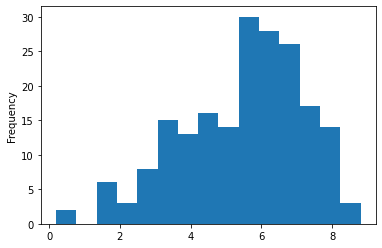

In [ ]:
# Для проверки гипотезы сохраним пользовательские рейтинги жанра Sports  в переменной  'Sp_score'
Sp_score = df_good.query('(genre == "Sports")&(user_score != 0.00)').user_score
print(f'Среднее значение оценок пользователей жанра Sports равно: { Sp_score.mean()}') # Вычислим среднее значение оценок пользователей  жанра Sports
print(f'Дисперсия оценок пользователей жанра Sports равна: {np.var( Sp_score)}')       # Вычислим дисперсию оценок пользователей  жанра Sports
print(' ')
print('Распределение оценок пользователей жанра Sports:')                         
Sp_score.plot(y= Sp_score, kind='hist', bins=15);                                      # Построим гистограмму распределения оценок пользователей жанра Sports

Средние значения оценок пользователей по жанрам имеют существенное различие , по гистограммам видно, что большее количество игр жанра Action оценены пользователями высокими оценками . Рассчитанные дисперсии отличаются, поэтому при расчете р-значения дисперсии учитывать не будем `equal_var = False`.  
Критический уровень статистической значимости примем `alpha = 0.05`.
Проверим гипотезы.

In [ ]:
alpha = 0.05  # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(Ac_score, Sp_score, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

p-значение: 4.24307776572644e-20
Отвергаем нулевую гипотезу


При проведении `ttest` не получилось отвергнуть нулевую гипотезу, наблюдаемое различие в расчетных средних слишком велико.

# Общий вывод

Анализ показал, что изначальных данных были пропуски по столбцам "name","year_of_release", "genre", "critic_score", "user_score","rating". Причина пропусков связана с тем, что до 94-ого года не было рейтинга ESRB, также, возможно, данные просто ошибочно не были введены.  
Так как до 94-ого года у нас были не все данные, а количество игр до этого периода выпускалось не так много, поэтому данные до 1994 года в исследовании не использовали.  
За анализированный период большего всего продаж было на платформах PS2 - 1233.56, X360 - 961.24, PS3 - 931.34, Wii - 891.18, DS -802.76  
Игровые предпочтения по жанрам и платформам схожи в Северной Америке, Европе и других странах, но отличаются с Японией: первые выбирают - жанры Action и Shooter-игры на платформах PlayStation и Xbox, а вторые - жанры Role-Playing и Action-игры на платформах Nintendo и PlayStation.  
Самый высокий рейтинг от критиков (кол-во макс.оценок) у игр жанра Sports, у пользователей - Role-Playing, Action.  
Оценки пользователей и критиков часто различаются по играм  
По рейтингу ESRB нет информации по жанру Role-Playing, который так любим в Японии, а есть игры, которые любят весь остальной мир - M и E (похоже, что это Shooter и Action-игры)  
Средние пользовательские рейтинги жанров Action и Sports отличаются, а по платформам Xbox One и PC одинаковые.  
Средняя продолжительность активности игры 8-10 лет  
Игры платформ PlayStation самые востребованные у пользователей. С каждым новым поколением игр эта платформы продаётся всё лучше. Это заметно с релизом новых версий этой платформы.
Перспективные игры выпускаются для платформ PS4 и XOne (консоли PlayStation 4 и Xbox one), жанров Shooter, Sports, Racing (если судить по медианным значениям продаж). Успешность игры также определяется и общим количеством проданных игр, по этому критерию лидируют игры жанров Action, Shooter, Sports. По моему мнению перспективные игры жанров Shooter, Sports, по общей сумме продаж они находятся на втором и третьем местах, а по медианным значениям продаж на первом и втором.  
Направление маркетинговой компании рекомендую планировать на игры в жанрах Shooter, Action, Sports на платформах PS4 и XOne для всего мира, а отдельно для Японии можно добавить игры жанра Role-Playing, Action на платформах 3DS, PS3.  


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
